In [ ]:
!sudo apt-get install libportaudio2
!pip install sounddevice

In [ ]:
!pip install playsound

In [ ]:
from scipy.fft import irfft
from scipy.fft import rfft, rfftfreq
import sounddevice as sd
import soundfile as sf
from playsound import playsound
from scipy.io import wavfile
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from IPython.display import Audio
import IPython.display as ipd
import wave
import numpy as np
import wave
import math
import ctypes as ct

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path1 = '/content/drive/My Drive/xyz/test_noise.wav'
path2 = '/content/drive/My Drive/xyz/test.wav'

In [ ]:
data1, fs1 = sf.read(path1, dtype='float32')
data2, fs2 = sf.read(path2, dtype='float32')

In [ ]:
#noisy_signal
ipd.Audio(data1, rate=fs1)

In [ ]:
#expected_signal
ipd.Audio(data2, rate=fs2)

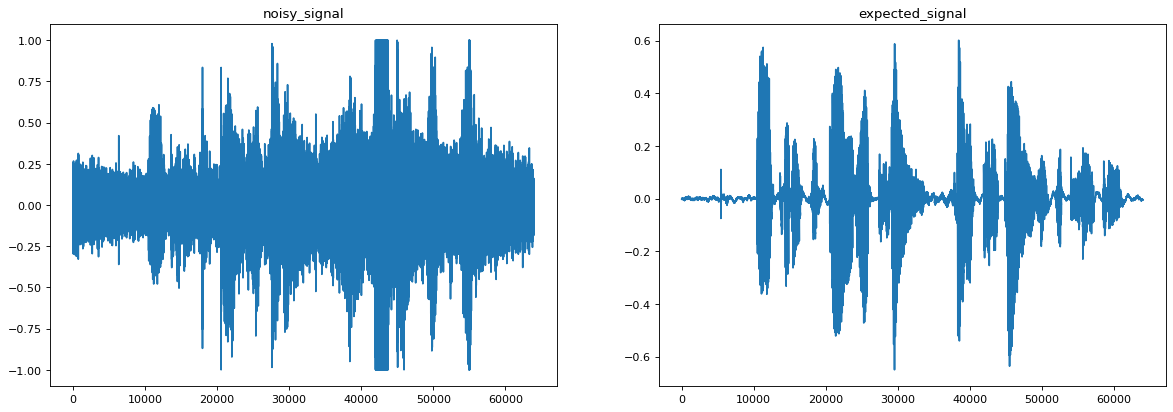

In [ ]:
figure(figsize=(18, 6), dpi=80)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.plot(data2)
plt.subplot(1, 2, 1)
plt.title('noisy_signal')
plt.plot(data1)
plt.show()

**Time Domain Filtering**

In [ ]:
data=data1.copy()
fs=fs1

In [ ]:
#set window size using arr, and use same index from arr2
arr = [2, 4, 6, 8]
arr2 = [2, 3, 4, 5]
ii = 1
jj = 1


now = []
for i in range(ii, len(data)-ii-1):
  sum = 0
  for j in range(i-arr2[jj], i+arr2[jj]):
   sum += data[j]
  now.append(sum/(2*jj+1))


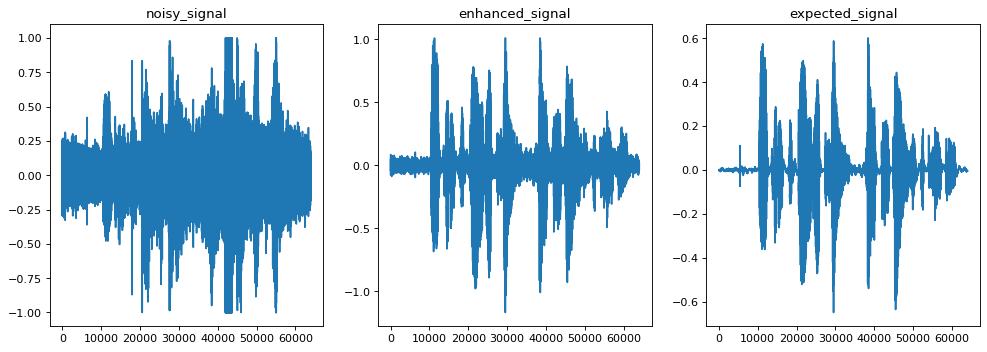

In [ ]:
figure(figsize=(15, 5), dpi=80)
plt.subplot(1, 3, 1)
plt.title('noisy_signal')
plt.plot(data1)
plt.subplot(1, 3, 2)
plt.title('enhanced_signal')
plt.plot(now)
plt.subplot(1, 3, 3)
plt.title('expected_signal')
plt.plot(data2)
plt.show()

In [ ]:

#noisy_signal
ipd.Audio(data1, rate=fs1)

In [ ]:
#enhanced_signal
ipd.Audio(now, rate=fs)

In [ ]:
#expected_signal
ipd.Audio(data2, rate=fs2)

**STFT PLOT**

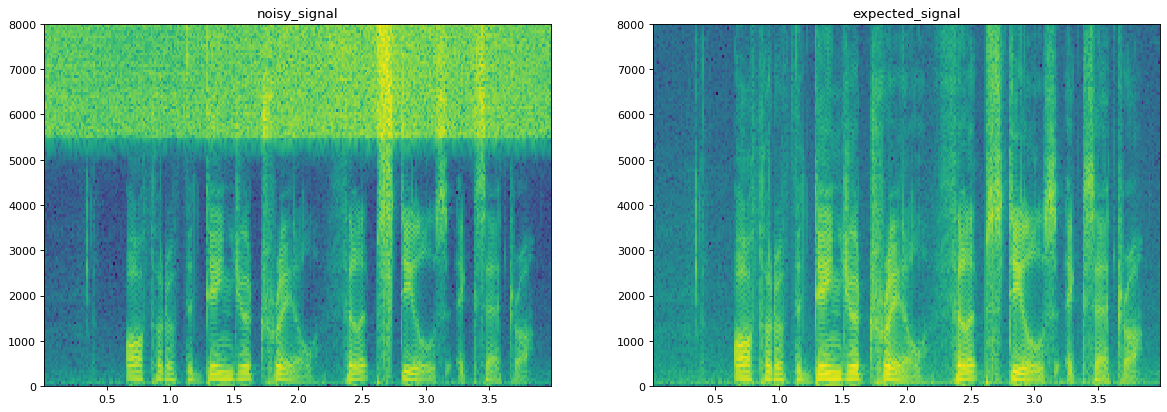

In [ ]:
figure(figsize=(18, 6), dpi=80)
freq, tim, spec = signal.spectrogram(data2, fs2)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.pcolormesh(tim, freq, np.log(spec))

freq, tim, spec = signal.spectrogram(data1, fs1)
plt.subplot(1, 2, 1)
plt.title('noisy_signal')
plt.pcolormesh(tim, freq, np.log(spec))

In [ ]:
def cal_fft(data,fs):
    N = len(data)

    yf = rfft(data)
    xf = rfftfreq(N, 1 / fs)
    return xf, yf


**Frequency domain Filtering**

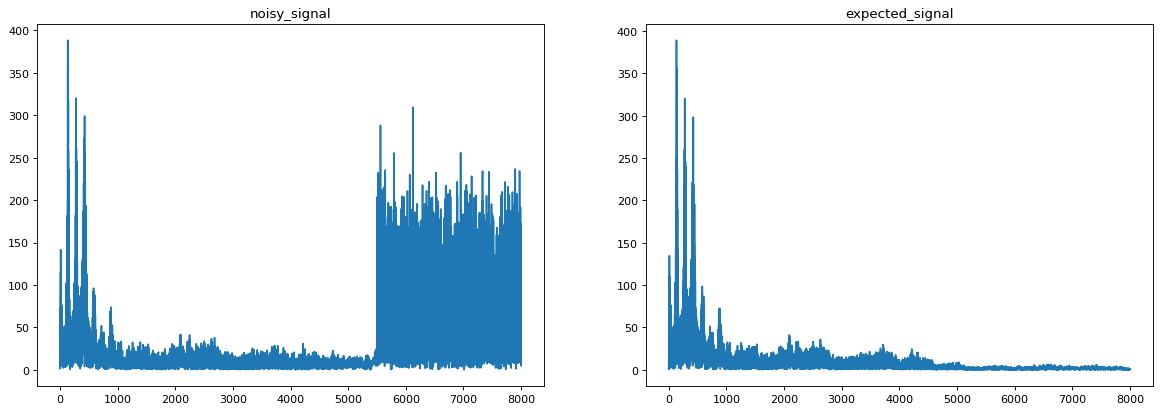

In [ ]:
#fft
figure(figsize=(18, 6), dpi=80)
xf1, yf1 = cal_fft(data1,fs1)
plt.subplot(1, 2, 1)
plt.title('noisy_signal')
plt.plot(xf1, np.abs(yf1))
xf2, yf2 = cal_fft(data2,fs2)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.plot(xf2, np.abs(yf2))


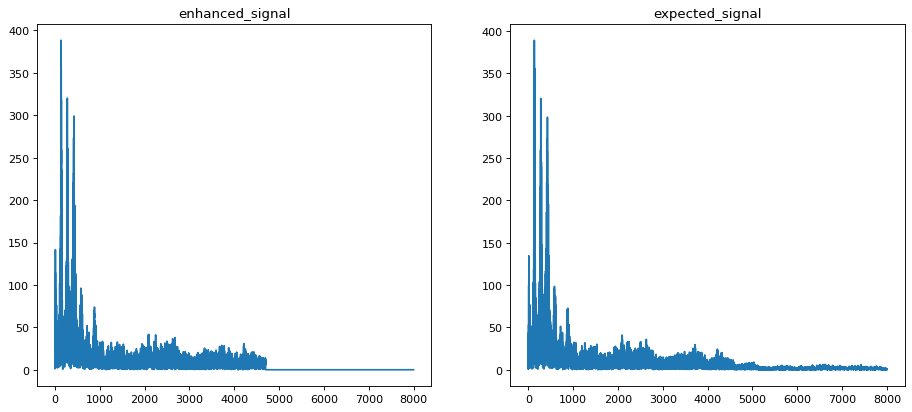

In [ ]:
#window frequecny threshold- 4700
for j in range(len(yf1)):
    if(xf1[j] >= 4700):
        yf1[j]=0
figure(figsize=(14, 6), dpi=80)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.plot(xf2, np.abs(yf2))
plt.subplot(1, 2, 1)
plt.title('enhanced_signal')
plt.plot(xf1, np.abs(yf1))
plt.show()

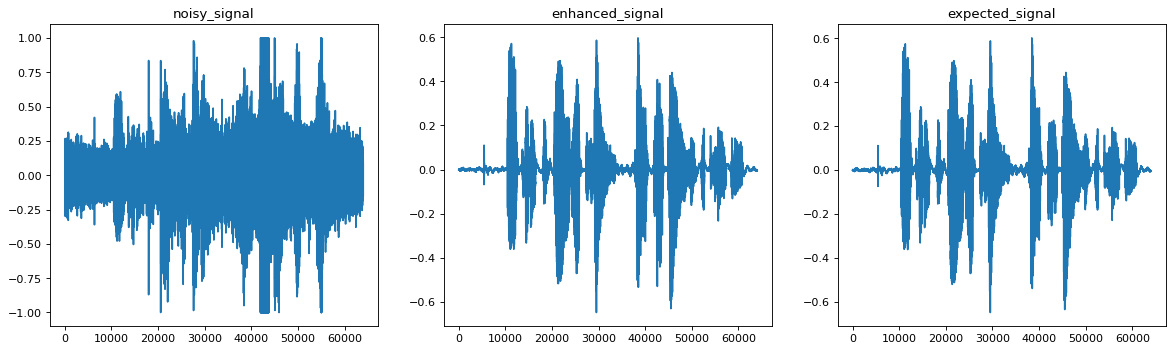

In [ ]:
new_sig = irfft(yf1)
figure(figsize=(18, 5), dpi=80)
plt.subplot(1, 3, 3)
plt.title('expected_signal')
plt.plot(data2)
plt.subplot(1, 3, 2)
plt.title('enhanced_signal')
plt.plot(new_sig)
plt.subplot(1, 3, 1)
plt.title('noisy_signal')
plt.plot(data1)
plt.show()

In [ ]:
#noisy_signal
ipd.Audio(data1, rate=fs1)

In [ ]:
#enhanced_signal
ipd.Audio(new_sig, rate=fs1)

In [ ]:
#expected_signal
ipd.Audio(data2, rate=fs2)

In [ ]:
data=data1.copy()

**Spectral Subtraction**

1. Using FFT

In [ ]:
noise=data.copy()
noise[10000:]=0

In [ ]:
#noise
ipd.Audio(noise, rate=fs1)

In [ ]:
fs = fs1
T = 1 / fs
L = 64000
t = (np.arange(L)) * T

In [ ]:
xf,yf=cal_fft(data,fs)
spectrum_noisy_signal_mag = abs(yf)
phase_signal = np.angle(yf)

In [ ]:
xf_noise,yf_noise = cal_fft(noise,fs)
spectrum_noise_mag = abs(yf_noise)

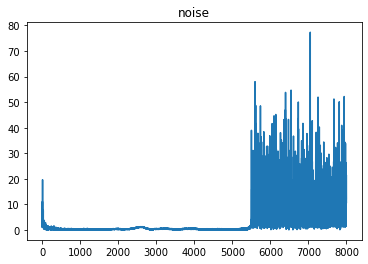

In [ ]:
plt.title('noise')
plt.plot(xf_noise,abs(yf_noise))

In [ ]:
gamma = 1
alpha = 20

In [ ]:
power_spectrum_noisy_signal_mag = abs(yf)**gamma
power_spectrum_noise_mag = abs(yf_noise)**gamma;

In [ ]:
subtracted_spectrum_mag2 = (power_spectrum_noisy_signal_mag -alpha*power_spectrum_noise_mag)**(1/gamma)
subtracted_spectrum_mag2[subtracted_spectrum_mag2 < 0] = 0

In [ ]:
enhanced_spectrum2 = subtracted_spectrum_mag2 * np.exp(1j*phase_signal);
new_sig = irfft(enhanced_spectrum2);

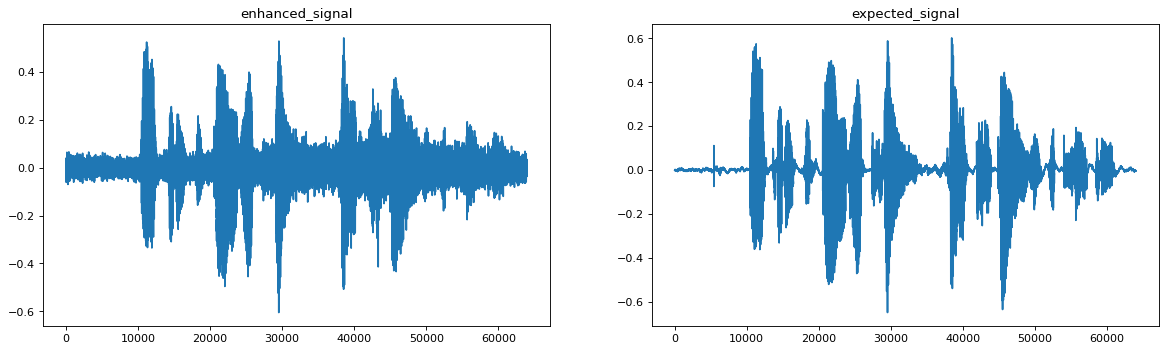

In [ ]:
figure(figsize=(18, 5), dpi=80)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.plot(data2)
plt.subplot(1, 2, 1)
plt.title('enhanced_signal')
plt.plot(np.real(new_sig));

In [ ]:
#noisy_signal
ipd.Audio(data1, rate=fs1)

In [ ]:
#enhanced_signal
ipd.Audio(new_sig, rate=fs1)

In [ ]:
#expected_signal
ipd.Audio(data2, rate=fs2)

2. Using STFT

In [ ]:
class FloatBits(ct.Structure):
    _fields_ = [
        ('M', ct.c_uint, 23),
        ('E', ct.c_uint, 8),
        ('S', ct.c_uint, 1)
    ]
 
 
class Float(ct.Union):
    _anonymous_ = ('bits',)
    _fields_ = [
        ('value', ct.c_float),
        ('bits', FloatBits)
    ]
 
 
def nextpow2(x):
    if x < 0:
        x = -x
    if x == 0:
        return 0
    d = Float()
    d.value = x
    if d.M == 0:
        return d.E - 127
    return d.E - 127 + 1

In [ ]:
def berouti(SNR):
  if -5.0 <= SNR <= 20.0:
    a = 4 - SNR * 3 / 20
  else:
    if SNR < -5.0:
      a = 5
    if SNR > 20:
      a = 1
  return a

In [ ]:
def berouti1(SNR):
  if -5.0 <= SNR <= 20.0:
    a = 3 - SNR * 2 / 20
  else:
    if SNR < -5.0:
      a = 4
    if SNR > 20:
      a = 1
  return a

In [ ]:
def find_index(x_list):
  index_list = []
  for i in range(len(x_list)):
    if x_list[i] < 0:
      index_list.append(i)
  return index_list

In [ ]:
data = wave.open(path1)
params = data.getparams()
frame_cnt=params[3]
fs=params[2]
data = data.readframes(frame_cnt)
data = np.fromstring(data, dtype=np.short)

In [ ]:
frame_size = 30 * fs // 1000
overlap = 50
no_of_overlap_samples=frame_size*overlap//100
no_of_samples_to_shift=frame_size-no_of_overlap_samples
Thres = 2
Expnt = 2.0
beta = 0.002
G = 0.9

In [ ]:

window=np.hamming(frame_size)
n_pt_fft=2 * 2 ** (nextpow2(frame_size))
winGain = no_of_samples_to_shift / np.sum(window)

In [ ]:
noise_mean = np.zeros(n_pt_fft) 
j = 0
for k in range(1, 31):
    noise_mean = noise_mean + abs(np.fft.fft(window * data[j:j + frame_size], n_pt_fft))
    j = j + frame_size
noise_mu = noise_mean / 30
k = 1
img = 1j

In [ ]:
data_old = np.zeros(no_of_overlap_samples)
stop_process=len(data)//no_of_samples_to_shift-1
data_final = np.zeros(stop_process * no_of_samples_to_shift)

In [ ]:
k=1
for n in range(stop_process):
  windowed_signal=window*data[k - 1:k + frame_size - 1]
  trans=np.fft.fft(windowed_signal,n_pt_fft)
  magnitude=abs(trans)
  phase=np.angle(trans)
  noise_seg = 10 * np.log10(np.linalg.norm(magnitude, 2) ** 2 / np.linalg.norm(noise_mu, 2) ** 2)
  if Expnt == 1.0: # amplitude spectrum
    alpha = berouti1(noise_seg)
  else: # power spectrum
    alpha = berouti(noise_seg)
  sub_speech = magnitude ** Expnt - alpha * noise_mu ** Expnt;
  diffw = sub_speech - beta * noise_mu ** Expnt
  z = find_index(diffw)
  if len(z) > 0:
    sub_speech[z] = beta * noise_mu[z] ** Expnt
    if noise_seg < Thres:
      noise_temp = G * noise_mu ** Expnt + (1 - G) * magnitude ** Expnt
      Noise_mu = noise_temp ** (1 / Expnt)
    sub_speech[n_pt_fft // 2 + 1:n_pt_fft] = np.flipud(sub_speech[1:n_pt_fft // 2])
    data_phase = (sub_speech ** (1 / Expnt)) * (np.array([math.cos(x) for x in phase]) + img * (np.array([math.sin(x) for x in phase])))
    data_now = np.fft.ifft(data_phase).real
    data_final[k - 1:k + no_of_samples_to_shift - 1] = data_old + data_now[0:no_of_overlap_samples]
    data_old = data_now[0 + no_of_overlap_samples:frame_size]
    k = k + no_of_samples_to_shift

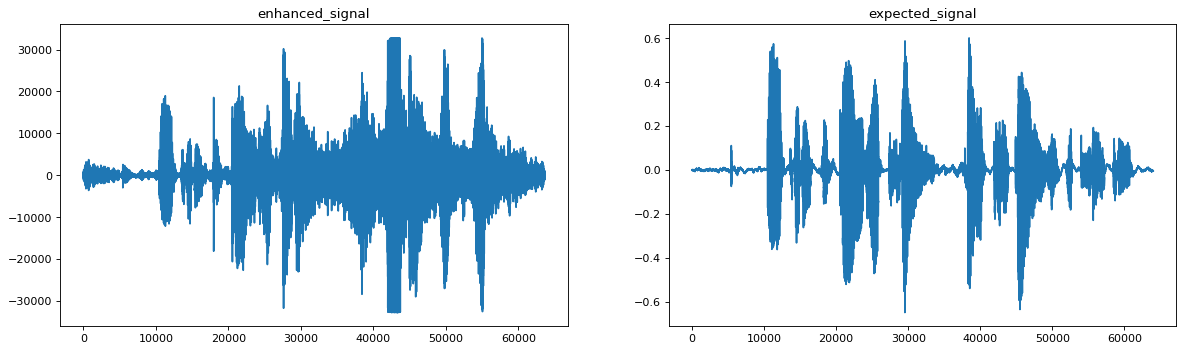

In [ ]:
new_sig = (winGain * data_final).astype(np.short)
figure(figsize=(18, 5), dpi=80)
plt.subplot(1, 2, 2)
plt.title('expected_signal')
plt.plot(data2)
plt.subplot(1, 2, 1)
plt.title('enhanced_signal')
plt.plot(new_sig)

In [ ]:
#noisy_signal
ipd.Audio(data1, rate=fs1)

In [ ]:
#enhanced_signal
ipd.Audio(new_sig, rate=fs)

In [ ]:
#expected_signal
ipd.Audio(data2, rate=fs2)